# SOLID STATE PHYSICS: 1D atomic chain

Written by Rupert Oulton and Romain Tirole in September 2021

Last update: October 2021

For more info: r.oulton@imperial.ac.uk

Imperial College London

# Introduction

In the lectures, we derived the dispersion relation ($\omega$ vs. $k$) and wavefunctions ($x_n(t)$) describing the displacements of atoms in a 1D chain. This is our model of lattice vibrations or phonons. Of course, phonons are the primary excitations on which solids store their internal energy. This Jupyter notebook is a tool to help you visualise these phonon vibrations. 

Latice vibrations are essentially plane waves. The solutions that we found in lectures are represented as atomic positions, $x_n(t)=X_n+u_n(t)$, where $X_n=na$ for integer $n$ are the equilibrium lattice positions, and $u_n(t)$ are the displacements of each atom from equilibrium. In this case, <br>
<br>
<center>$u_n(t)=Ae^{i(kna-\omega t)}$, 
    
where the wavenumber, $k$, and frequency, $\omega_k$, are related by:<br>
<br>

<center>$ \omega_k = 2 \omega_D \left|\sin\left(\frac{ka}{2}\right) \right|$

# Running the code
The following code simply displays this information, while the slider bar on the side allow you to adjust the wavenumber.

Please run all cells in a sequence without modifying the code. The last section 'Results' is meant for you to play with the given parameters to explore the physics of lattice vibrations.

The code runs for 400 frames and then stops. You only need run the Results cell to restart the animation. You can slide the value of k up and down to explore the variation phonon modes.

# Import modules

In [1]:
import numpy as np
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
from matplotlib.gridspec import GridSpec
from ipywidgets import interact, FloatSlider, IntSlider, interact_manual, widgets, Layout, FloatSlider

# Dispersion function

In [2]:
def dispersion(ka):
    
    # Debye frequency is assumed to be 1. In any, we normalise frequency.
    a=1
    k = np.linspace(-1,1,101)*np.pi/a
    k_a = ka*np.pi/a

    omega = 2*abs(np.sin(k*a/2))
    omega_a = 2*abs(np.sin(k_a*a/2))
    
    return k, k_a, omega, omega_a

# Results

<IPython.core.display.Javascript object>


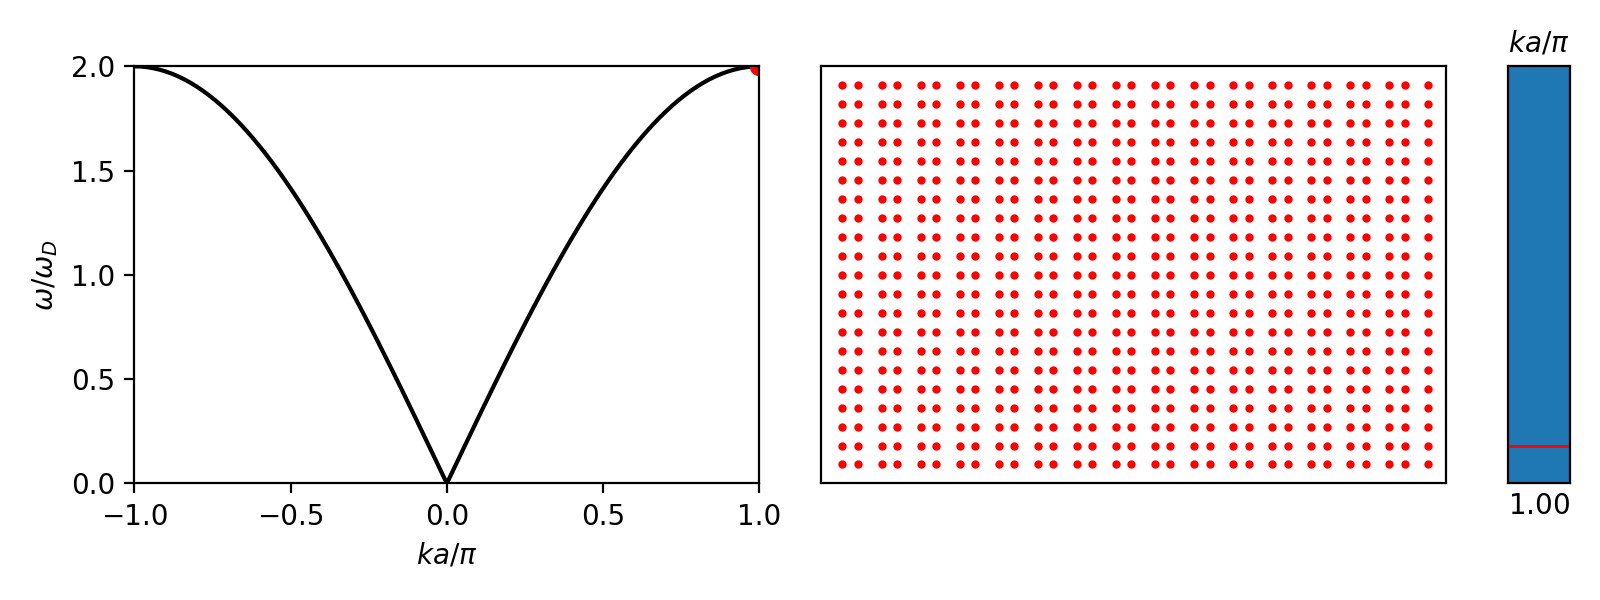

ToggleButton(value=True, description='Stop/Start', tooltip='Description')

In [5]:
fig = plt.figure(tight_layout=True, figsize=[8,3])
gs = GridSpec(1, 3, figure=fig, width_ratios=[1,1,0.1])
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax_a = fig.add_subplot(gs[0,2])
p1, = ax1.plot([], [], 'k-')
p2, = ax1.plot([], [], 'ro', markerfacecolor='red', markersize = 6)
ax1.set_xlabel(r'$ka/\pi$')
ax1.set_ylabel(r'$\omega/\omega_D$')
line, = ax2.plot([], [], 'ro', markerfacecolor='red', markersize = 2)
ax2.set_xticks([])
ax2.set_yticks([])

def init():
    #p1.set_data([], [])
    #p2.set_data([], [])
    line.set_data([], [])
    return line#, p1, p2

def animate(frame):
    a=1
    k, k_a, omega, omega_a = dispersion(s_a.val)
    p1.set_data(k/(np.pi), omega)
    p2.set_data(k_a/(np.pi), omega_a)
    N = 30
    ax2.set_xlim([-1, N+1])
    ax2.set_ylim([-11, 11])
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, 2])
    
    xn = np.arange(N+1)*a
    amp = 0.1
    
    tmax = 20*2*np.pi/omega_a
    t = np.linspace(0,tmax,400)
    val = 1j*(k_a*xn - omega_a*t[frame])
    u = amp*np.real(np.exp(val))
    
    xVals = [xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u, xn+u]
    yVals = [0*xn-10, 0*xn-9, 0*xn-8, 0*xn-7, 0*xn-6, 0*xn-5, 0*xn-4, 0*xn-3, 0*xn-2, 0*xn-1, 0*xn, 0*xn+1, 0*xn+2, 0*xn+3, 0*xn+4, 0*xn+5, 0*xn+6, 0*xn+7, 0*xn+8, 0*xn+9, 0*xn+10]
    
    line.set_data(xVals, yVals)

    return line, p1, p2

s_a = Slider(ax_a, r'$ka/\pi$', 0.01, 1, valinit=0.1, valstep=0.01, orientation='vertical')
#s_a.on_changed(FuncAnimation(fig, animate, init_func=init, frames = 200, interval=100, blit=True))

onOff = widgets.ToggleButton(
    value=True,
    description='Stop/Start',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='' # (FontAwesome names without the `fa-` prefix)
)
display(onOff)

def on_change(value):
    anim.event_source.stop()
    if onOff.value == True:
        anim.event_source.start()

onOff.observe(on_change,'value')

anim = FuncAnimation(fig, animate, init_func=init, frames = 400, interval=100, blit=True, repeat=True)
